L'analisi è andata avanti applicando la **Regressione Logistica** al dataset ottenuto dopo aver estratto le features *Presentation*, *Reputation*, *Time*, *Affect* e *Linguistic*. <br>
É stata considerata come variabile dipendente la variabile `is_featured` e come variabili indipendenti le metriche associate alle suddette 5 features. <br><br>
**Variabile dipendente**: `is_featured` <br><br>
**Variabili indipendenti**: 
* `version` indica la versione del prodotto
* `tags_number` indica il numero di tag scelti dal maker al momento della creazione del post
* `score` indica il punteggio che il post ha ottenuto dagli utenti
* `is_best_time_to_launch` è una variabile booleana (Yes/No) che indica se il post è stato lanciato all'orario consigliato (00:01:00 - 8:59:59)
* `is_best_day_to_launch` è una variabile booleana (Yes/No) che indica se il post è stato lanciato nel giorno consigliato (Lunedì o Martedì)
* `is_weekend` è una variabile booleana (Yes/No) che indica se il post è stato lanciato di Sabato o Domenica
* `positive_description_sentiment` indica il sentimento positivo derivato dalla descrizione del post scritta dal maker 
* `negative_description_sentiment` indica il sentimento negativo derivato dalla descrizione del post scritta dal maker
* `text_description_length` indica la lunghezza della descrizione del post. Questa variabile è stata discretizzata utilizzando l'algoritmo k-means individuando tre cluster: Short, Medium e Long.
* `sentence_length_in_the_description` indica la lunghezza delle frasi presenti nella descrizione del post. Questa variabile è stata discretizzata utilizzando l'algoritmo k-means individuando tre cluster: Short, Medium e Long.
* `bullet_points_explicit_features` è una variabile booleana (Yes/No) che indica se nella descrizione del post sono presenti elenchi puntati o caratteristiche esplicite
* `emoji_in_description` è una varibile booleana (Yes/No) che indica se nella descrizione del post sono presenti delle emoji
* `tagline_length` indica la lunghezza della tagline del post. Questa variabile è stata discretizzata utilizzando l'algoritmo k-means individuando tre cluster: Short, Medium e Long.
* `emoji_in_tagline` è una variabile booleana (Yes/No) che indica se nella tagline del post sono presenti delle emoji
* `are_there_video` è una variabile booleana (Yes/No) che indica se il post contiene dei video
* `are_there_tweetable_images` è una variabile booleana (Yes/No) che indica se il post contiene delle immagini "tweetable"
* `are_there_gif_images` è una variabile booleana (Yes/No) che indica se il post contiene delle immagini gif
* `number_of_gif` indica il numero di gif presenti nel post
* `offers` è una variabile booleana (Yes/No) che indica se nei commenti del post sono presenti delle offerte riguardanti quel prodotto
* `promo_discount_codes` è una variabile booleana (Yes/No) che indica se nei commenti del post sono presenti codici promozionali riguardanti quel prodotto
* `are_there_questions` è una variabile booleana (Yes/No) che indica se nei commenti del post sono presenti delle domande su quel prodotto
* `hunter_has_twitter` è una variabile booleana (Yes/No) che indica se l'hunter possiede un account twitter
* `hunter_has_website` è una variabile booleana (Yes/No) che indica se l'hunter possiede un sito web
* `hunter_followers` indica il numero di followers che ha l'hunter. Questa variabile è stata discretizzata utilizzando l'algoritmo k-means individuando tre cluster: Low, Medium e High.
* `hunter_apps_made` indica il numero di post lanciati (e quindi il numero di applicazioni fatte) dall'hunter. Questa variabile è stata discretizzata utilizzando l'algoritmo k-means individuando tre cluster: Low, Medium e High.
* `hunter_follows_up_on_comments` è una variabile booleana (Yes/No) che indica se l'hunter partecipa attivamente nella discussione nei commenti del post
* `maker_has_twitter` è una variabile booleana (Yes/No) che indica se il maker possiede un account twitter
* `maker_has_website` è una variabile booleana (Yes/No) che indica se il maker possiede un sito web
* `maker_followers` indica il numero di followers che ha il maker. Questa variabile è stata discretizzata utilizzando l'algoritmo k-means individuando tre cluster: Low, Medium e High.
* `maker_started_comment_thread` è una variabile booleana (Yes/No) che indica se nel thread è stato lui il primo a scrivere un commento
* `maker_comment_ratio` indica, nel caso in cui la variabile maker_started_comment_thread assume valore Yes, la percentuale di commenti scritti dal maker
* `hunter_is_maker` è una variabile booleana (Yes/No) che indica se l'hunter che ha cacciato il post è il maker
* `maker_positive_comment` indica il sentimento positivo derivato dai commenti scritti dal maker il giorno in cui ha lanciato il post
* `maker_negative_comment` indica il sentimento negativo derivato dai commenti scritti dal maker il giorno in cui ha lanciato il post
* `others_positive_comment` indica il sentimento positivo derivato dai commenti scritti dagli altri utenti il giorno in cui il maker ha lanciato il post
* `others_negative_comment` indica il sentimento negativo derivato dai commenti scritti dagli altri utenti il giorno in cui il maker ha lanciato il post
* `topic` indica il topic dominante per il post. Questa variabile è stata discretizzata in: web_development, creativity e community.

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
csv_directory = os.getcwd()[:-40] + 'dataset\\'
dataset = 'features.csv'
csv_path = os.path.join(csv_directory, dataset)
mydata = pd.read_csv(csv_path, delimiter=';', usecols=['is_featured', 'version', 'tags_number', 
                                                       'is_best_time_to_launch', 'is_best_day_to_launch', 
                                                       'is_weekend', 
                                                       'discretized_positive_description_score', 
                                                       'discretized_negative_description_score', 
                                                       'text_description_length', 
                                                       'sentence_length_in_the_description', 'bullet_points_explicit_features', 
                                                       'emoji_in_description', 'tagline_length', 'emoji_in_tagline', 
                                                       'are_there_video', 'are_there_tweetable_images', 'are_there_gif_images', 
                                                       'number_of_gif', 'offers', 'promo_discount_codes', 
                                                       'are_there_questions', 'hunter_has_twitter', 'hunter_has_website', 
                                                       'hunter_followers', 'hunter_apps_made', 'hunter_follows_up_on_comments', 
                                                       'maker_has_twitter', 'maker_has_website', 'maker_followers', 
                                                       'maker_started_comment_thread', 'maker_comment_ratio', 'thread_length',
                                                       'hunter_is_maker', 
                                                       'discretized_maker_positive_comment_score', 
                                                       'discretized_maker_negative_comment_score', 
                                                       'discretized_others_positive_comment_score', 
                                                       'discretized_others_negative_comment_score', 
                                                       'topic'])

mydata = mydata.rename(columns = {'discretized_positive_description_score': 'positive_description_sentiment', 
                         'discretized_negative_description_score': 'negative_description_sentiment', 
                         'discretized_maker_positive_comment_score': 'maker_positive_comment',
                         'discretized_maker_negative_comment_score': 'maker_negative_comment',
                         'discretized_others_positive_comment_score': 'others_positive_comment', 
                         'discretized_others_negative_comment_score': 'others_negative_comment'})

pd.set_option('display.max_columns', 39)
mydata.head()

,version,tags_number,is_featured,is_best_time_to_launch,is_best_day_to_launch,is_weekend,positive_description_sentiment,negative_description_sentiment,text_description_length,sentence_length_in_the_description,bullet_points_explicit_features,emoji_in_description,tagline_length,emoji_in_tagline,are_there_video,are_there_tweetable_images,are_there_gif_images,number_of_gif,offers,promo_discount_codes,are_there_questions,hunter_has_twitter,hunter_has_website,hunter_followers,hunter_apps_made,hunter_follows_up_on_comments,maker_has_twitter,maker_has_website,maker_followers,maker_started_comment_thread,maker_comment_ratio,thread_length,hunter_is_maker,maker_positive_comment,maker_negative_comment,others_positive_comment,others_negative_comment,topic
0,1.0,4,Yes,Yes,Yes,No,True,False,Short,Short,No,No,Long,No,No,Yes,No,0,No,No,Yes,Yes,Yes,Low,Medium,Yes,Yes,Yes,Low,No,0.0,21,No,False,False,True,True,web development
1,1.0,6,Yes,No,No,No,True,False,Medium,Medium,No,No,Long,No,No,No,No,0,No,No,No,Yes,Yes,Low,Low,Yes,Yes,Yes,Low,No,0.0,3,No,False,False,True,False,web development
2,1.0,2,Yes,Yes,No,No,True,True,Long,Short,No,No,Long,No,No,No,No,0,No,No,No,Yes,No,High,High,Yes,Yes,Yes,Low,No,0.0,1,No,False,False,True,False,web development
3,1.0,3,Yes,No,No,Yes,True,False,Long,Short,No,No,Long,No,Yes,No,No,0,No,No,No,No,Yes,Low,Low,No,No,Yes,Low,No,0.0,3,Yes,False,False,False,False,community
4,1.0,4,Yes,No,No,No,False,True,Medium,Short,No,No,Medium,No,No,No,Yes,1,No,No,No,Yes,No,Low,Low,No,Yes,Yes,Low,No,0.0,8,No,True,True,True,True,community


# Standardizzazione dati dataset

In [3]:
from sklearn.preprocessing import StandardScaler

# Create the Scaler object
scaler = StandardScaler()

# Fit your data on the scaler object
# mydata = scaler.fit_transform(mydata)
# mydata['version'] = scaler.fit_transform(mydata['version'].values.reshape(-1,1))
mydata[['version', 'tags_number', 'number_of_gif', 'maker_comment_ratio', 'thread_length']] = scaler.fit_transform(
    mydata[['version', 'tags_number', 'number_of_gif', 'maker_comment_ratio', 'thread_length']])

In [4]:
standardized_csv = 'standardized_features_without_score.csv'
mydata.to_csv(standardized_csv, sep=';', index=False)

In [5]:
mydata.head()

,version,tags_number,is_featured,is_best_time_to_launch,is_best_day_to_launch,is_weekend,positive_description_sentiment,negative_description_sentiment,text_description_length,sentence_length_in_the_description,bullet_points_explicit_features,emoji_in_description,tagline_length,emoji_in_tagline,are_there_video,are_there_tweetable_images,are_there_gif_images,number_of_gif,offers,promo_discount_codes,are_there_questions,hunter_has_twitter,hunter_has_website,hunter_followers,hunter_apps_made,hunter_follows_up_on_comments,maker_has_twitter,maker_has_website,maker_followers,maker_started_comment_thread,maker_comment_ratio,thread_length,hunter_is_maker,maker_positive_comment,maker_negative_comment,others_positive_comment,others_negative_comment,topic
0,-0.252493,0.546302,Yes,Yes,Yes,No,True,False,Short,Short,No,No,Long,No,No,Yes,No,-0.469332,No,No,Yes,Yes,Yes,Low,Medium,Yes,Yes,Yes,Low,No,-0.464796,2.096791,No,False,False,True,True,web development
1,-0.252493,1.646996,Yes,No,No,No,True,False,Medium,Medium,No,No,Long,No,No,No,No,-0.469332,No,No,No,Yes,Yes,Low,Low,Yes,Yes,Yes,Low,No,-0.464796,-0.190598,No,False,False,True,False,web development
2,-0.252493,-0.554393,Yes,Yes,No,No,True,True,Long,Short,No,No,Long,No,No,No,No,-0.469332,No,No,No,Yes,No,High,High,Yes,Yes,Yes,Low,No,-0.464796,-0.444752,No,False,False,True,False,web development
3,-0.252493,-0.004046,Yes,No,No,Yes,True,False,Long,Short,No,No,Long,No,Yes,No,No,-0.469332,No,No,No,No,Yes,Low,Low,No,No,Yes,Low,No,-0.464796,-0.190598,Yes,False,False,False,False,community
4,-0.252493,0.546302,Yes,No,No,No,False,True,Medium,Short,No,No,Medium,No,No,No,Yes,0.650794,No,No,No,Yes,No,Low,Low,No,Yes,Yes,Low,No,-0.464796,0.444788,No,True,True,True,True,community


# Impostazione delle variabili di default per la regressione logistica

Per impostare le variabili di default durante l'esecuzione della regressione logistica sono state create delle variabili `dummy`. In particolare:
- per le variabili booleane è stato impostato come default il valore *No*
- per la lunghezza della descrizione, delle frasi presenti nella descrizione e della tagline di ogni post è stato impostato come default il valore *Short*
- per il numero di follower degli hunter, per il numero di follower dei maker e per il numero di applicazioni/prodotti fatti dall'hunter è stato impostato come default il valore *High*
- per la variabile topic è stato impostato come default il valore *web development*

In [6]:
target = mydata['is_featured']  # dependent variable
mydata = mydata.drop(['is_featured'], axis=1)  # independent variables

In [7]:
target = target.replace({'Yes': 1, 'No': 0})

In [8]:
mydata = pd.get_dummies(mydata, columns=['is_best_time_to_launch', 'is_best_day_to_launch', 'is_weekend', 
                                         'positive_description_sentiment', 'negative_description_sentiment',
                                         'bullet_points_explicit_features', 'emoji_in_description', 'emoji_in_tagline', 
                                         'are_there_video', 'are_there_tweetable_images', 'are_there_gif_images', 'offers', 
                                         'promo_discount_codes', 'are_there_questions', 'hunter_has_twitter', 
                                         'hunter_has_website', 'hunter_follows_up_on_comments', 'maker_has_twitter', 
                                         'maker_has_website', 'maker_started_comment_thread', 'hunter_is_maker', 
                                         'maker_positive_comment', 'maker_negative_comment', 'others_positive_comment', 
                                         'others_negative_comment'], 
                        drop_first=True)

mydata = mydata.rename(columns = {'positive_description_sentiment_True': 'positive_description_sentiment', 
                                  'negative_description_sentiment_True': 'negative_description_sentiment', 
                                  'maker_positive_comment_True': 'maker_positive_comment', 
                                  'maker_negative_comment_True': 'maker_negative_comment', 
                                  'others_positive_comment_True': 'others_positive_comment', 
                                  'others_negative_comment_True': 'others_negative_comment'})

In [9]:
mydata = pd.get_dummies(mydata, columns=['text_description_length', 'sentence_length_in_the_description', 'tagline_length', 
                                         'hunter_followers', 'hunter_apps_made', 'maker_followers'])

mydata = mydata.drop(['text_description_length_Short', 'sentence_length_in_the_description_Short', 'tagline_length_Short', 
                     'hunter_followers_High', 'hunter_apps_made_High', 'maker_followers_High'], axis=1)

In [10]:
mydata = pd.get_dummies(mydata, columns = ['topic'])
mydata = mydata.drop(['topic_web development'], axis=1)

In [11]:
pd.set_option('display.max_columns', 48)
mydata.head()

,version,tags_number,number_of_gif,maker_comment_ratio,thread_length,is_best_time_to_launch_Yes,is_best_day_to_launch_Yes,is_weekend_Yes,positive_description_sentiment,negative_description_sentiment,bullet_points_explicit_features_Yes,emoji_in_description_Yes,emoji_in_tagline_Yes,are_there_video_Yes,are_there_tweetable_images_Yes,are_there_gif_images_Yes,offers_Yes,promo_discount_codes_Yes,are_there_questions_Yes,hunter_has_twitter_Yes,hunter_has_website_Yes,hunter_follows_up_on_comments_Yes,maker_has_twitter_Yes,maker_has_website_Yes,maker_started_comment_thread_Yes,hunter_is_maker_Yes,maker_positive_comment,maker_negative_comment,others_positive_comment,others_negative_comment,text_description_length_Long,text_description_length_Medium,sentence_length_in_the_description_Long,sentence_length_in_the_description_Medium,tagline_length_Long,tagline_length_Medium,hunter_followers_Low,hunter_followers_Medium,hunter_apps_made_Low,hunter_apps_made_Medium,maker_followers_Low,maker_followers_Medium,topic_community,topic_creativity
0,-0.252493,0.546302,-0.469332,-0.464796,2.096791,1,1,0,1,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0
1,-0.252493,1.646996,-0.469332,-0.464796,-0.190598,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0
2,-0.252493,-0.554393,-0.469332,-0.464796,-0.444752,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
3,-0.252493,-0.004046,-0.469332,-0.464796,-0.190598,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0
4,-0.252493,0.546302,0.650794,-0.464796,0.444788,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,1,1,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0


# AUC Score e Curva ROC

In [12]:
from sklearn.model_selection import train_test_split

trainX, testX, trainy, testy = train_test_split(mydata, target, test_size=0.3, train_size=0.7, random_state=30)

In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(trainX, trainy)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
# predict probabilities
lr_probs = model.predict_proba(testX)
lr_probs = lr_probs[:, 1]

In [15]:
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [16]:
lr_auc = roc_auc_score(testy, lr_probs)
print("AUC Value = {}".format(round(lr_auc, 3))) 

AUC Value = 0.924


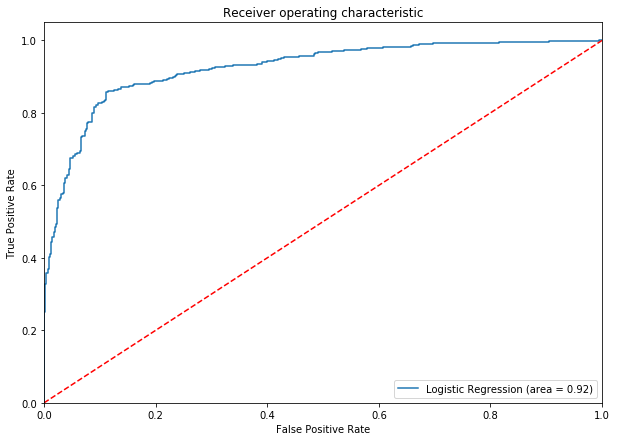

In [17]:
lr_fpr, lr_tpr, threshold = roc_curve(testy, lr_probs)
plt.figure(figsize=(10,7))
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (area = %0.2f)' % lr_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('AUC_ROC_Curve_without_score.png')
plt.show()